# Lab1: Series Temporales
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

1. Levantar los datos desde el archivo dataset/Telefonia_movil.csv. Los mismos fueron extraídos de
http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de-suscriptores-de-telefonia-movil-miles-de-minutos/
2. Explorar los datos, visualizarlos.
3. Implementar dos modelos (como ser Random Walk (Naïve) y Exponential Smoothing).
4. Visualizar los resultados y evaluarlos, comparando ambas implementaciones.

In [1]:
#paquetería...

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#seteos...

sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
pd.options.display.float_format = '{:.2f}'.format

## Data: ENACOM

Ente Nacional de Comunicaciones: Tráfico de suscriptores de telefonía móvil.

In [4]:
#leemos data y parceamos por trimestres...

data = pd.read_csv('datasets/Telefonia_movil.csv')
data['Quarter'] = pd.PeriodIndex(data.Año.map(str) + 'q'+ data.Trimestre.map(str), freq = 'Q')
data.set_index('Quarter', inplace = True)
data


Año  Trimestre Minutos pospago salientes (miles)  \
Quarter                                                      
2013Q1   2013          1                         8.785.943   
2013Q2   2013          2                         9.512.689   
2013Q3   2013          3                        10.315.484   
2013Q4   2013          4                         9.809.515   
2014Q1   2014          1                        10.128.751   
2014Q2   2014          2                        10.821.463   
2014Q3   2014          3                        11.524.344   
2014Q4   2014          4                        11.997.330   
2015Q1   2015          1                        10.273.637   
2015Q2   2015          2                        11.226.576   
2015Q3   2015          3                        11.766.711   
2015Q4   2015          4                        11.905.073   
2016Q1   2016          1                        11.230.991   
2016Q2   2016          2                        11.493.027   
2016Q3   2016          3                        11.923.391   
2016Q4   2016          4                        15.960.765   
2017Q1   2017          1                        14.630.269   
2017Q2   2017          2                        15.315.167   
2017Q3   2017          3                        15.106.275   
2017Q4   2017          4                        14.164.552   
2018Q1   2018          1                        13.423.580   
2018Q2   2018          2                        14.240.217   
2018Q3   2018          3                        14.574.305   
2018Q4   2018          4                        14.915.060   
2019Q1   2019          1                        13.937.271   

         Minutos prepago salientes (miles)  \
Quarter                                      
2013Q1                             6582117   
2013Q2                             7108640   
2013Q3                             7335154   
2013Q4                             6250549   
2014Q1                             5799223   
2014Q2                             6438071   
2014Q3                             7179152   
2014Q4                             7147630   
2015Q1                             6480172   
2015Q2                             6579819   
2015Q3                             7198826   
2015Q4                             7301039   
2016Q1                             6656647   
2016Q2                             6778732   
2016Q3                             7077838   
2016Q4                             6938892   
2017Q1                             6209983   
2017Q2                             6293563   
2017Q3                             6308373   
2017Q4                             5380710   
2018Q1                             5850985   
2018Q2                             6027374   
2018Q3                             6108477   
2018Q4                             6613685   
2019Q1                             6427084   

         Total de minutos salientes (miles)        Periodo  
Quarter                                                     
2013Q1                             15368060   Ene-Mar 2013  
2013Q2                             16621329   Abr-Jun 2013  
2013Q3                             17650638  Jul-Sept 2013  
2013Q4                             16060064   Oct-Dic 2013  
2014Q1                             15927974   Ene-Mar 2013  
2014Q2                             17259534   Abr-Jun 2014  
2014Q3                             18703495  Jul-Sept 2014  
2014Q4                             19144961   Oct-Dic 2014  
2015Q1                             16753809   Ene-Mar 2015  
2015Q2                             17806395   Abr-Jun 2015  
2015Q3                             18965537  Jul-Sept 2015  
2015Q4                             19206111   Oct-Dic 2015  
2016Q1                             17887638   Ene-Mar 2016  
2016Q2                             18271759   Abr-Jun 2016  
2016Q3                             19001229  Jul-Sept 2016  
2016Q4                             22899656   Oct-Dic 2

In [5]:
#convertimos columna 'Minutos pospago salientes (miles)' a Int64...

data['Minutos pospago salientes (miles)'] = data['Minutos pospago salientes (miles)'].str.replace('.', '').astype('Int64')
data.dtypes

Año                                    int64
Trimestre                              int64
Minutos pospago salientes (miles)      int64
Minutos prepago salientes (miles)      int64
Total de minutos salientes (miles)     int64
Periodo                               object
dtype: object

In [6]:
#generamos series...

y_pospago = data['Minutos pospago salientes (miles)']
y_prepago = data['Minutos prepago salientes (miles)']
y_total = data['Total de minutos salientes (miles)']

## Análisis Exploratorio.

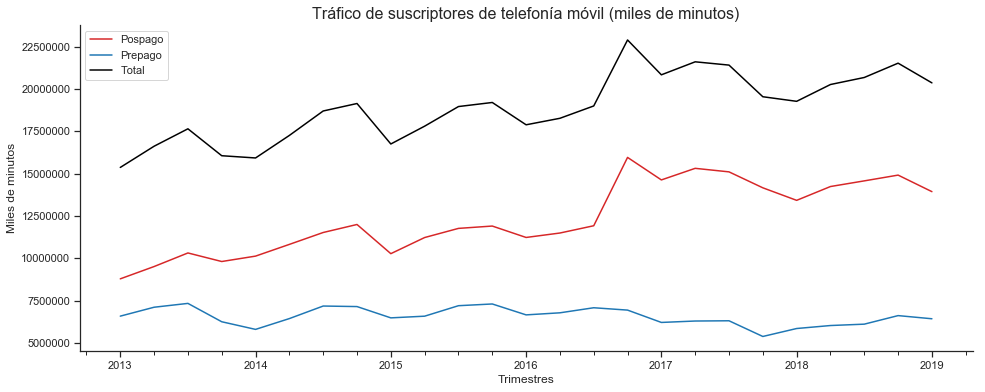

In [7]:
#

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

y_pospago.plot(color = red, label = 'Pospago')
y_prepago.plot(color = blue, label = 'Prepago')
y_total.plot(color = 'black', label = 'Total')

ax.set_title('Tráfico de suscriptores de telefonía móvil (miles de minutos)', fontsize = 16)
ax.set_xlabel('Trimestres')
ax.set_ylabel('Miles de minutos')
plt.legend(loc = 'best')

sns.despine()
plt.show()

In [8]:
#side by side...
from IPython.display import display_html

def siamesas(*args):
    html_str = ''
    spaciador = '<table style="min-width: 50px !important;"><tr style="min-width: 50px !important; background:none !important;"><td style="min-width: 50px !important;"></td></tr></table>'
    for df in args:
        html_str += df.to_html() + spaciador
        
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw = True)

In [9]:
#miramos un poquito...

siamesas(pd.DataFrame(y_pospago).describe().round(2), pd.DataFrame(y_prepago).describe().round(2), pd.DataFrame(y_total).describe().round(2))


Minutos pospago salientes (miles) 
 
 
 
 
 count 
 25.00 
 
 
 mean 
 12359295.44 
 
 
 std 
 2085582.33 
 
 
 min 
 8785943.00 
 
 
 25% 
 10821463.00 
 
 
 50% 
 11905073.00 
 
 
 75% 
 14240217.00 
 
 
 max 
 15960765.00 
 
 
 
 
 
 
 Minutos prepago salientes (miles) 
 
 
 
 
 count 
 25.00 
 
 
 mean 
 6562909.40 
 
 
 std 
 516860.40 
 
 
 min 
 5380710.00 
 
 
 25% 
 6250549.00 
 
 
 50% 
 6579819.00 
 
 
 75% 
 7077838.00 
 
 
 max 
 7335154.00 
 
 
 
 
 
 
 Total de minutos salientes (miles) 
 
 
 
 
 count 
 25.00 
 
 
 mean 
 18922204.72 
 
 
 std 
 1982378.31 
 
 
 min 
 15368060.00 
 
 
 25% 
 17650638.00 
 
 
 50% 
 19001229.00 
 
 
 75% 
 20364355.00 
 
 
 max 
 22899656.00

## Enfoque: RandomWalk (Naïve).

In [10]:
#predicción para y_pospago...

h = 4
test_pospago = pd.period_range(start = y_pospago.index[-1] + 1, periods = h, freq = 'Q')
pred_pospago = pd.Series(np.repeat(y_pospago.iloc[-1], h), index = test_pospago)
pred_pospago


2019Q2    13937271
2019Q3    13937271
2019Q4    13937271
2020Q1    13937271
Freq: Q-DEC, dtype: int64

In [11]:
#predicción para y_prepago...

h = 4
test_prepago = pd.period_range(start = y_prepago.index[-1]+1, periods = h, freq = 'Q')
pred_prepago = pd.Series(np.repeat(y_prepago.iloc[-1], h), index = test_prepago)
pred_prepago


2019Q2    6427084
2019Q3    6427084
2019Q4    6427084
2020Q1    6427084
Freq: Q-DEC, dtype: int64

In [12]:
#predicción para y_total...

h = 4
test_total = pd.period_range(start = y_total.index[-1]+1, periods = h, freq = 'Q')
pred_total = pd.Series(np.repeat(y_total.iloc[-1], h), index = test_total)
pred_total


2019Q2    20364355
2019Q3    20364355
2019Q4    20364355
2020Q1    20364355
Freq: Q-DEC, dtype: int64

In [13]:
#desvios para y_pospago...

resid_pospago = y_pospago - y_pospago.shift(1)
sigma_pospago = resid_pospago.std()

round(sigma_pospago, 3)


1111026.926

In [14]:
#desvios para y_prepago...

resid_prepago = y_prepago - y_prepago.shift(1)
sigma_prepago = resid_prepago.std()

round(sigma_prepago, 3)


510832.977

In [15]:
#desvios para y_total...

resid_total = y_total - y_total.shift(1)
sigma_total = resid_total.std()

round(sigma_total, 3)


1409600.295

In [16]:
#intervalos de pronósticos para y_pospago...

intv_pospago = pd.concat([pred_pospago - stats.norm.ppf(0.975) * sigma_pospago * np.sqrt(np.arange(1, h + 1)),
                   pred_pospago + stats.norm.ppf(0.975) * sigma_pospago * np.sqrt(np.arange(1, h + 1))], axis = 1)

intv_pospago.round(3)


0           1
2019Q2 11759698.24 16114843.76
2019Q3 10857718.07 17016823.93
2019Q4 10165604.34 17708937.66
2020Q1  9582125.48 18292416.52

In [17]:
#intervalos de pronósticos para y_prepago...

intv_prepago = pd.concat([pred_prepago - stats.norm.ppf(0.975) * sigma_prepago * np.sqrt(np.arange(1, h + 1)),
                   pred_prepago + stats.norm.ppf(0.975) * sigma_prepago * np.sqrt(np.arange(1, h + 1))], axis = 1)

intv_prepago.round(3)


0          1
2019Q2 5425869.76 7428298.24
2019Q3 5011153.25 7843014.75
2019Q4 4692930.07 8161237.93
2020Q1 4424655.53 8429512.47

In [18]:
#intervalos de pronósticos para y_total...

intv_total = pd.concat([pred_total - stats.norm.ppf(0.975) * sigma_total * np.sqrt(np.arange(1, h + 1)),
                   pred_total + stats.norm.ppf(0.975) * sigma_total * np.sqrt(np.arange(1, h + 1))], axis = 1)

intv_total.round(3)


0           1
2019Q2 17601589.19 23127120.81
2019Q3 16457214.12 24271495.88
2019Q4 15579104.25 25149605.75
2020Q1 14838823.38 25889886.62

In [19]:
#fanchart tuneada...

def mi_fanchart(y, forecast, intv1, intv2, intv3, tit):
    assert type(y) == pd.core.series.Series, 'The time series must be a pandas series'
    assert type(forecast) == pd.core.series.Series, 'The forecast must be a pandas series'

    last = y.iloc[-1:]
    extended = last.append(forecast)

    with sns.axes_style('ticks'):
        fig, ax = plt.subplots(figsize = (16, 4))
        plt.title(tit, fontsize = 16)
        plt.ticklabel_format(style = 'plain')
        y.plot(color = '#D62728')
        extended.plot(color = 'black', alpha = 0.4, label = 'Point forecast')
        ax.fill_between(extended.index, last.append(intv3.iloc[:, 0]), last.append(intv3.iloc[:, 1]), facecolor = '#FAB8A4', lw = 0)
        ax.fill_between(extended.index, last.append(intv2.iloc[:, 0]), last.append(intv2.iloc[:, 1]), facecolor = '#F58671', lw = 0)
        ax.fill_between(extended.index, last.append(intv1.iloc[:, 0]), last.append(intv1.iloc[:, 1]), facecolor = '#F15749', lw = 0)
        hold = ax.get_ylim()
        ax.fill_betweenx(ax.get_ylim(), extended.index[0], extended.index[-1], facecolor='grey', alpha = 0.15)
        ax.set_ylim(hold)
    return fig, ax


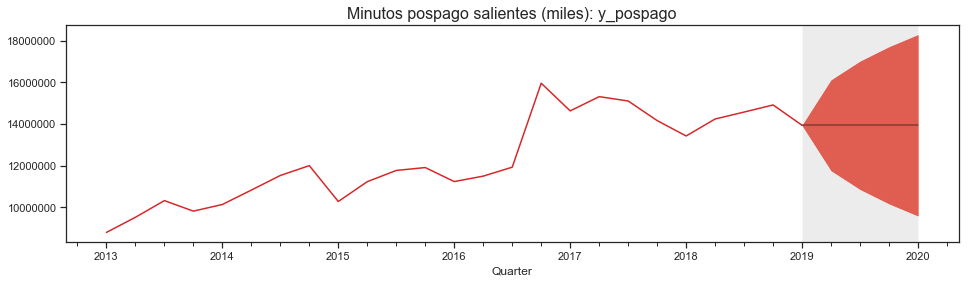

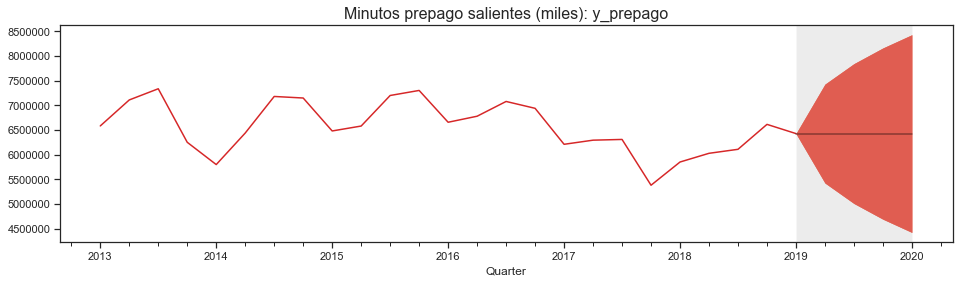

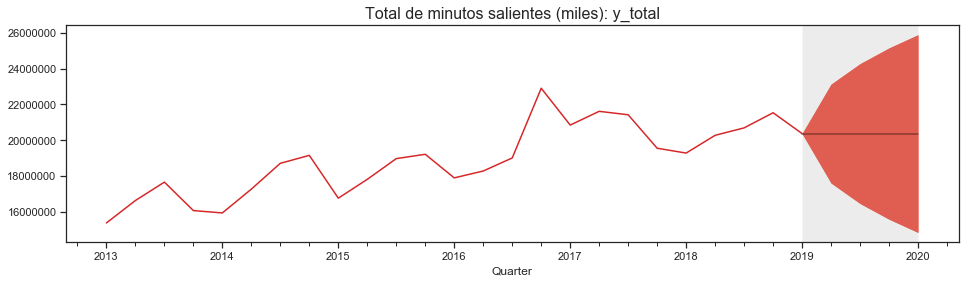

In [20]:
#

#from plotting import fanchart

point_pred_pospago = (intv_pospago[0] + intv_pospago[1]) / 2
fig, ax1 = mi_fanchart(y_pospago, point_pred_pospago, intv_pospago, intv_pospago, intv_pospago, 'Minutos pospago salientes (miles): y_pospago')


point_pred_prepago = (intv_prepago[0] + intv_prepago[1]) / 2
fig, ax2 = mi_fanchart(y_prepago, point_pred_prepago, intv_prepago, intv_prepago, intv_prepago, 'Minutos prepago salientes (miles): y_prepago')

point_pred_total = (intv_total[0] + intv_total[1]) / 2
fig, ax2 = mi_fanchart(y_total, point_pred_total, intv_total, intv_total, intv_total, 'Total de minutos salientes (miles): y_total')

#plt.show()

## Enfoque: Simple exponential smoothing (sobre y_total).

In [21]:
#para y_total...

model_ses = sm.tsa.SimpleExpSmoothing(y_total).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  endog   No. Observations:                   25
Model:             SimpleExpSmoothing   SSE                 43907864549324.172
Optimized:                       True   AIC                            708.856
Trend:                           None   BIC                            711.294
Seasonal:                        None   AICC                           710.856
Seasonal Periods:                None   Date:                 Fri, 13 Sep 2019
Box-Cox:                        False   Time:                         18:27:12
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6030715                alpha                 True
initial_level             1.5372e+07                  l.0                 True
------------------------------------------------------------------------------
"""

In [22]:
#observamos MSE para y_total...

mse_ses = sm.tools.eval_measures.mse(y_total, fitted_ses)
print(' MSE               {0:.3f}'.format(mse_ses))


 MSE               1756314581972.967


In [23]:
#calculamos AIC / BIC...

N = len(y_total)
loglik_ses = -(N/2) * (1 + np.log(2 * np.pi)) - (N/2) * np.log(mse_ses)
aic_ses = -2 * loglik_ses + 2 * 3
bic_ses = -2 * loglik_ses  +np.log(N) * 3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))


 Log-likelihood    -387.901
 AIC               781.803
 BIC               785.460


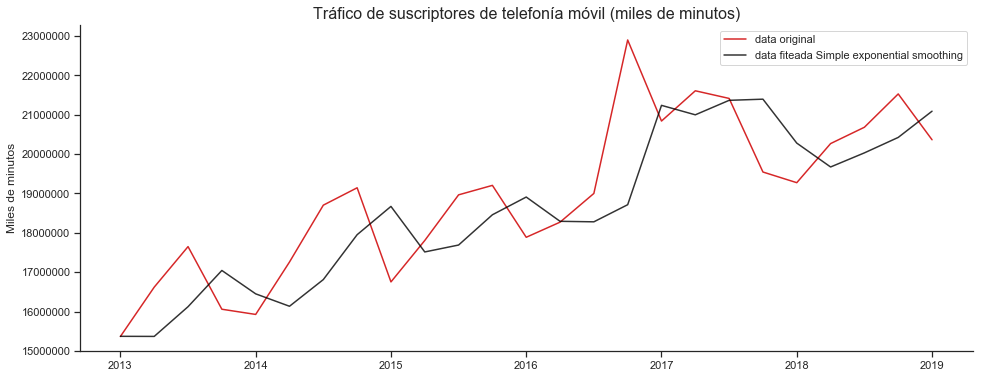

In [24]:
#observamos data-original vs data-fiteada...

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

y_total.plot(color = red, label = 'data original')
fitted_ses.plot(color = 'black', label = 'data fiteada Simple exponential smoothing', alpha = 0.8)
ax.set_xlabel('')
ax.set_ylabel('Miles de minutos')
ax.set_title('Tráfico de suscriptores de telefonía móvil (miles de minutos)', fontsize = 16)
ax.set_xticks([], minor = True) 
plt.legend(loc = 'best')

sns.despine()
plt.show()


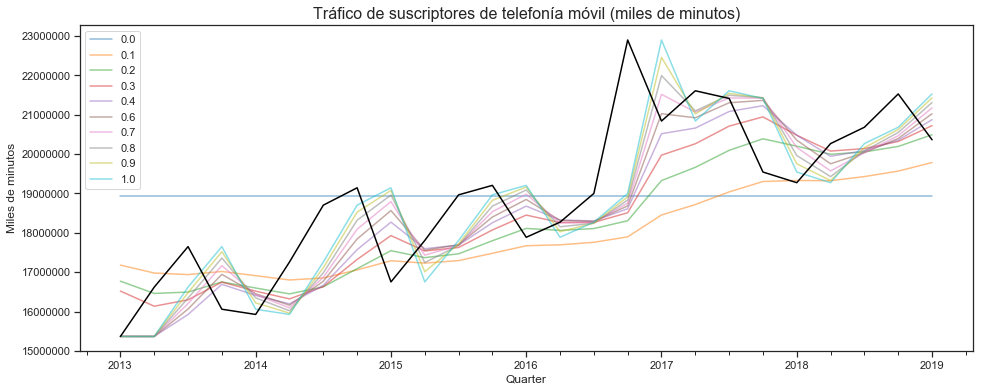

In [25]:
#jugamos con smoothing parameter...

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

for alpha in np.linspace(0, 1, 10):
    model_ses = sm.tsa.SimpleExpSmoothing(y_total).fit(smoothing_level = alpha)
    fitted_ses = model_ses.fittedvalues
    fitted_ses.plot(alpha = .5)

ax.set_xlabel('')
ax.set_ylabel('Miles de minutos')
ax.set_title('Tráfico de suscriptores de telefonía móvil (miles de minutos)', fontsize = 16)

y_total.plot(color = 'black')
ax.legend(np.round(np.linspace(0, 1, 10), 1))

plt.show()


## Análisis de Residuos (sobre y_total).

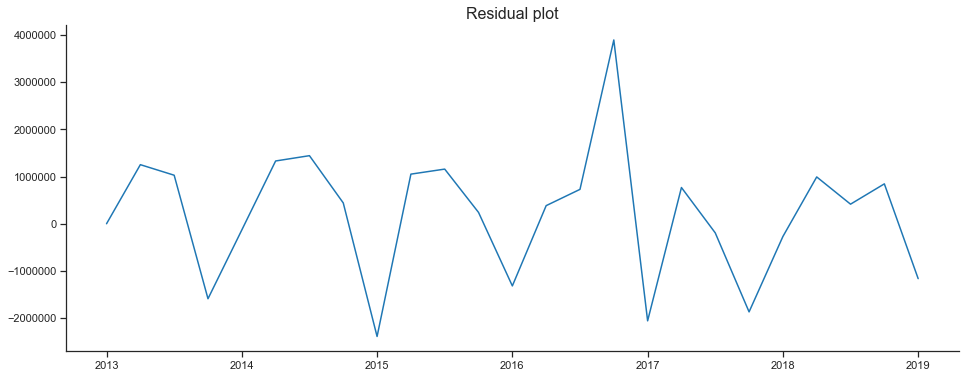

In [26]:
#

resid = y_total - fitted_ses

fig, ax = plt.subplots(figsize = (16, 6))
resid.plot(color = blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot', fontsize = 16)

sns.despine()
plt.show()


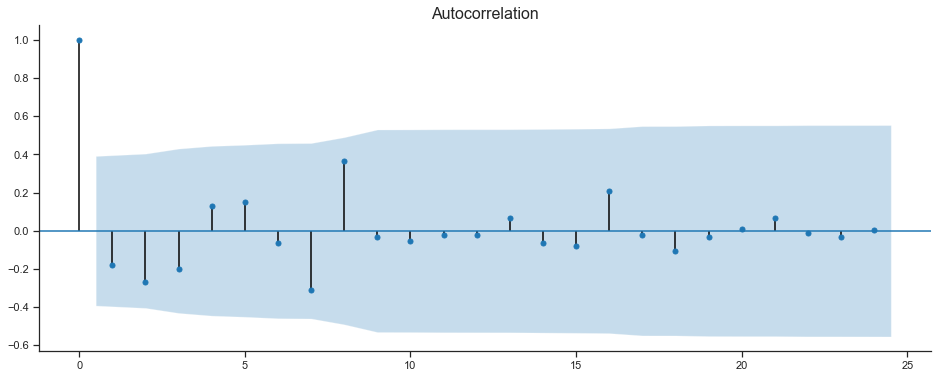

In [27]:
#Autocorrelación de residuos (ACF)...

fig, ax = plt.subplots(figsize = (16, 6))

sm.graphics.tsa.plot_acf(resid, lags = 24, ax = ax)
ax.set_title('Autocorrelation', fontsize = 16)

sns.despine()
plt.show()


C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


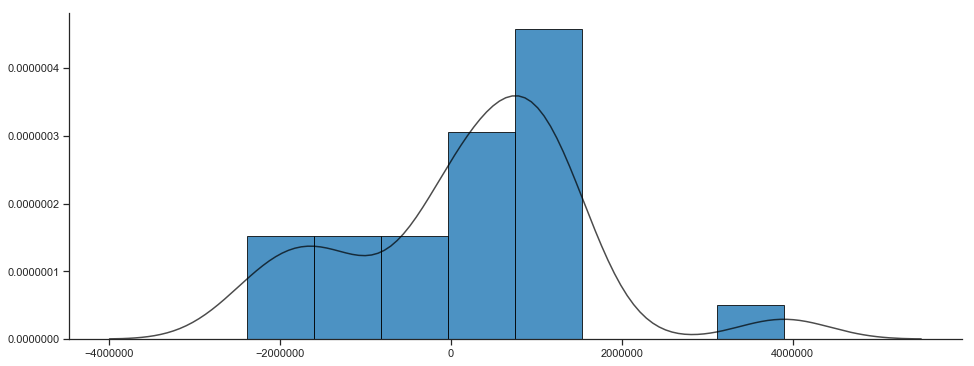

In [28]:
#histograma (distribución de residuos)...

def hist(series):
    fig, ax = plt.subplots(figsize = (16, 6))
    plt.ticklabel_format(style = 'plain')
    
    sns.distplot(series, ax = ax, hist_kws = {'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws = {'color': 'black', 'alpha': 0.7})
    
    sns.despine()
    return fig, ax

hist(resid)
plt.show()


## Validación del Modelo: Forecasting.

In [29]:
y_total

Quarter
2013Q1    15368060
2013Q2    16621329
2013Q3    17650638
2013Q4    16060064
2014Q1    15927974
2014Q2    17259534
2014Q3    18703495
2014Q4    19144961
2015Q1    16753809
2015Q2    17806395
2015Q3    18965537
2015Q4    19206111
2016Q1    17887638
2016Q2    18271759
2016Q3    19001229
2016Q4    22899656
2017Q1    20840252
2017Q2    21608730
2017Q3    21414647
2017Q4    19545262
2018Q1    19274565
2018Q2    20267591
2018Q3    20682782
2018Q4    21528745
2019Q1    20364355
Freq: Q-DEC, Name: Total de minutos salientes (miles), dtype: int64

In [30]:
#comparamos random walk y simple exponential smoothing methods...

validation = y_total['2014Q1':].index # the validation period is Q1 2014 onwards
start = y_total.index.get_loc('2014Q1') # numerical index corresponding to Q1 2015

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y_total)):
    
    actual.append(y_total.iloc[i]) # actual value
    
    pred1.append(y_total.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y_total.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1, pred2, actual]).T
results_sm = pd.DataFrame(results_sm, columns = columns, index = validation)
results_sm.tail()


C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


RW         SES      Actual
Quarter                                    
2018Q1  19545262.00 20385645.09 19274565.00
2018Q2  19274565.00 19597864.79 20267591.00
2018Q3  20267591.00 20031541.34 20682782.00
2018Q4  20682782.00 20403618.89 21528745.00
2019Q1  21528745.00 21140908.79 20364355.00

In [31]:
#¿cuál de las predicciones es mas precisa?

from scipy import stats

table = pd.DataFrame(0.0, index = results_sm.columns[:-1], columns = ['RMSE', 'SE'])
for i in range(2):
    table.iloc[i, 0] = sm.tools.eval_measures.rmse(results_sm.iloc[:, i], results_sm.iloc[:, -1])
    table.iloc[i, 1] = (results_sm.iloc[:, i] - results_sm.iloc[:, -1]).sem()
    
table.round(3)


RMSE        SE
RW  1407131.77 311288.34
SES 1531329.32 336063.48

## Forecast

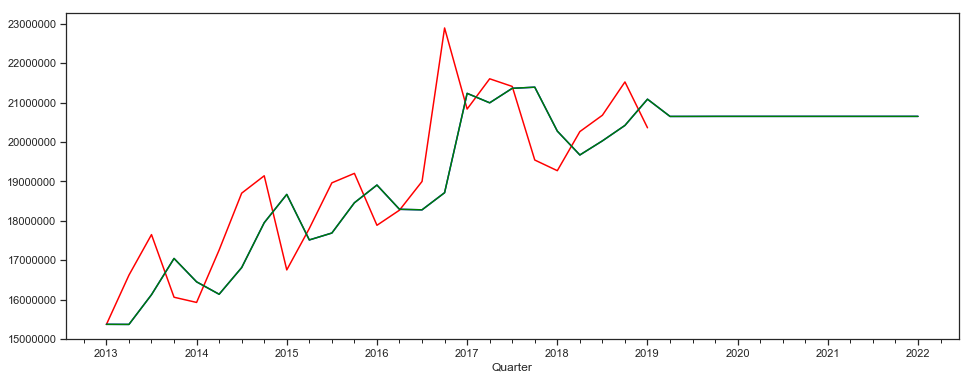

In [32]:
#

h = 12
w = h * 10
data = y_total

plt.ticklabel_format(style = 'plain')

model = sm.tsa.SimpleExpSmoothing
pred_index = y_total.index[-1] + np.array(range(1, h + 1))
pred_rolling = pd.Series(0, index = pred_index)
pred_expanding = pd.Series(0, index = pred_index)

orig_exp = None
orig_roll = None
for i in range(0, h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i == 0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
        
ax = data[-w:].plot(color = 'red', figsize = (16, 6))
pd.concat([orig_fit[-w:], pred_expanding]).plot(ax = ax, color = 'blue');
pd.concat([orig_roll[-w:], pred_rolling]).plot(ax = ax, color = 'green');
